==== RGB uncertainty ====
max:0.013594582676887512; min:4.460629660237546e-14
==== Density uncertainty ====
max:0.9970008134841919; min:0.0


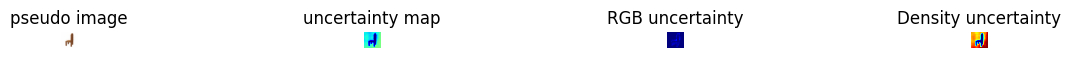

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import math
import cv2 as cv

%matplotlib inline

def kappa_to_alpha(pred_kappa):
    alpha = ((2 * pred_kappa) / ((pred_kappa ** 2.0) + 1)) \
    + ((np.exp(- pred_kappa * np.pi) * np.pi) / (1 + np.exp(- pred_kappa * np.pi)))
    alpha = np.degrees(alpha)
    return alpha

start = 60
length = 1
for idx in range(start, start+length):
    img = torch.load(f"/home/shenxi/interns/JiYuchen/semi-nerf/visiualization/tensor/img_{idx}.pt")
    cv.imwrite(f'shapenet_{idx}.png', img*255)
    uncertainty = torch.load(f"/home/shenxi/interns/JiYuchen/semi-nerf/visiualization/tensor/img_{idx}_uncertainty.pt")
    std_rgb = torch.load(f"/home/shenxi/interns/JiYuchen/semi-nerf/visiualization/tensor/img_{idx}_rgb.pt")
    std_density = torch.load(f"/home/shenxi/interns/JiYuchen/semi-nerf/visiualization/tensor/img_{idx}_density.pt")
    
    # redefined uncertainty
    uncertainty = std_density + std_rgb*100

    print("==== RGB uncertainty ====")
    print(f"max:{np.max(std_rgb)}; min:{np.min(std_rgb)}")
    print("==== Density uncertainty ====")
    print(f"max:{np.max(std_density)}; min:{np.min(std_density)}")

    # 大致上，RGB的方差预测不确定度更为准确；density作为不确定度更关注是否是空白区域
    plt.figure().set_size_inches(15,15)

    plt.subplot(idx,4,1)
    plt.imshow(img)
    plt.title('pseudo image')
    plt.axis('off')

    plt.subplot(idx,4,2)
    plt.imshow(uncertainty[...,0], vmin=0.0, vmax=2, cmap='jet')
    plt.title('uncertainty map')
    plt.axis('off')

    plt.subplot(idx,4,3)
    plt.imshow(std_rgb[...,0], vmin=0.0, vmax=np.max(std_rgb), cmap='jet')
    plt.title('RGB uncertainty')
    plt.axis('off')

    plt.subplot(idx,4,4)
    plt.imshow(std_density[...,0], vmin=0.0, vmax=1, cmap='jet')
    plt.title('Density uncertainty')
    plt.axis('off')
    
    idx+=1

plt.show()